# Harmonický oscilátor jako numerický výpočet

In [20]:
import numpy as np
import matplotlib.pyplot as plt

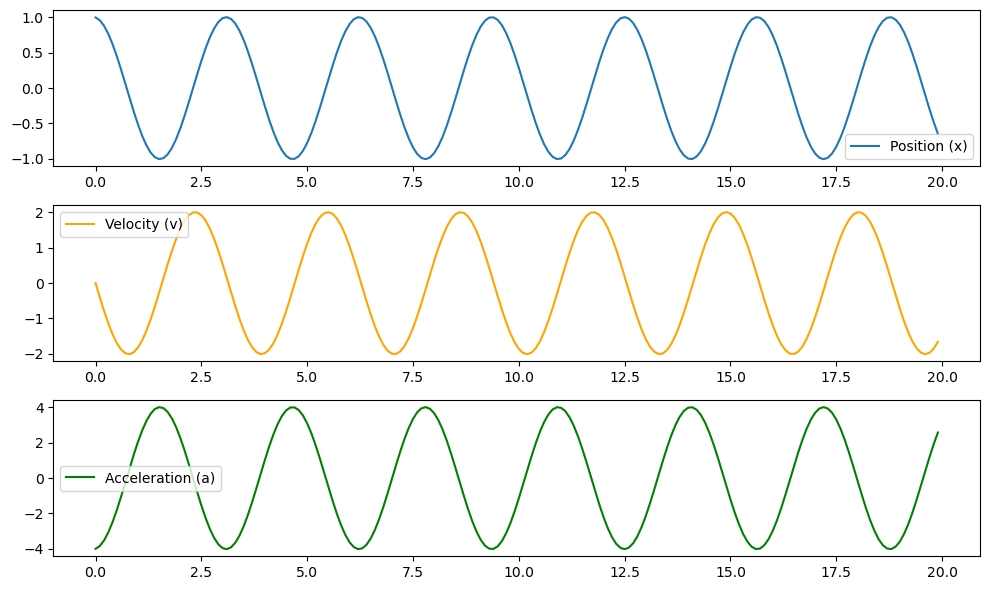

In [21]:
m = 1
k = 4
dt = 0.1
t_max = 20
t = np.arange(0, t_max, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)
a = np.zeros_like(t)
x[0] = 1.0
v[0] = 0.0
a[0] = -k/m * x[0]

def harmonic_oscillator(t, x, v, a, k=k, m=m, dt=dt):
    for i in range(len(t)-1):
        a[i] = -k/m * x[i] 
        v[i+1] = v[i] + a[i] * dt
        x[i+1] = x[i] + v[i+1] * dt
    a[-1] = -k/m * x[-1] 
    return x, v, a

x, v, a = harmonic_oscillator(t, x, v, a)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Position (x)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, v, label='Velocity (v)', color='orange')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, a, label='Acceleration (a)', color='green')
plt.legend()
plt.tight_layout()

# Energie

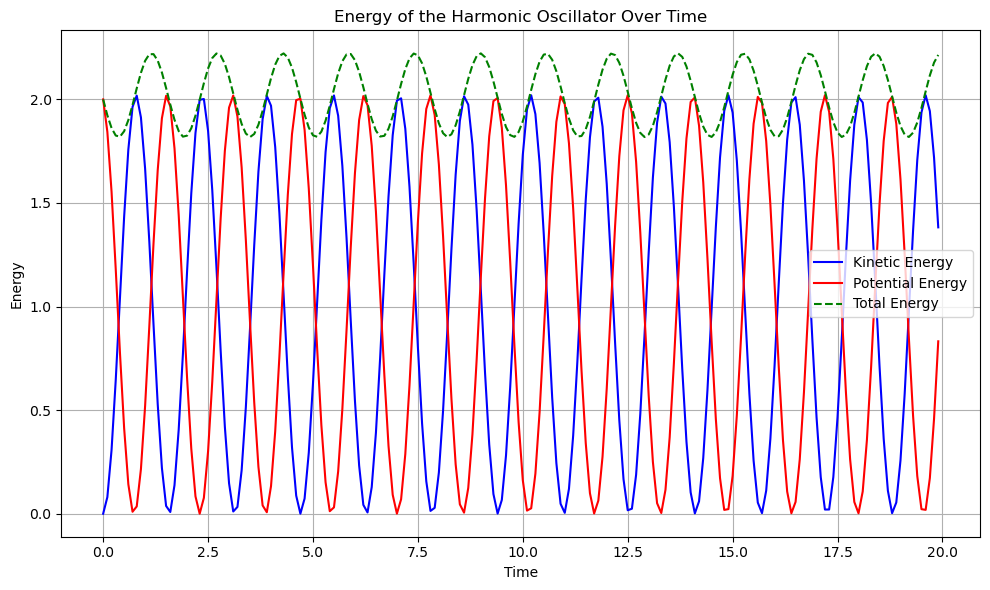

In [22]:
def energy_calculation(m, k, x, v):
    kinetic_energy = 0.5 * m * v**2
    potential_energy = 0.5 * k * x**2
    total_energy = kinetic_energy + potential_energy
    return kinetic_energy, potential_energy, total_energy

energy_kinetic, energy_potential, energy_total = energy_calculation(m, k, x, v)

plt.figure(figsize=(10, 6))
plt.plot(t, energy_kinetic, label='Kinetic Energy', color='blue')   
plt.plot(t, energy_potential, label='Potential Energy', color='red')
plt.plot(t, energy_total, label='Total Energy', color='green', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy of the Harmonic Oscillator Over Time')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

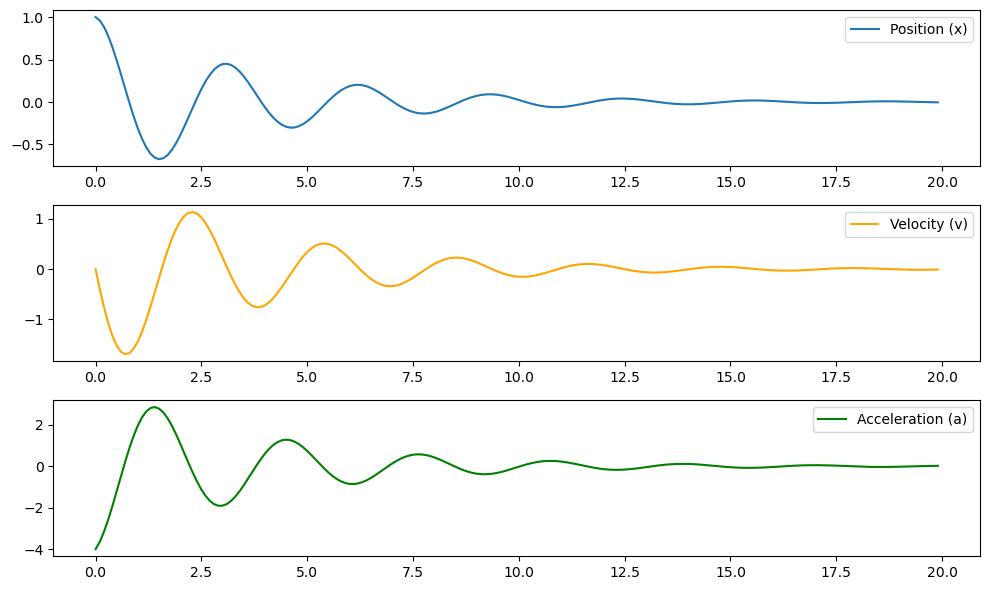

In [23]:
m = 1
k = 4
dt = 0.1
t_max = 20
t = np.arange(0, t_max, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)
a = np.zeros_like(t)
x[0] = 1.0
v[0] = 0.0
a[0] = -k/m * x[0]

def harmonic_oscillator(t, x, v, a, k=k, m=m, dt=dt):
    for i in range(len(t)-1):
        a[i] = -k/m * x[i] - 0.5 * v[i]  
        v[i+1] = v[i] + a[i] * dt
        x[i+1] = x[i] + v[i+1] * dt
    a[-1] = -k/m * x[-1] - 0.5 * v[-1]  
    return x, v, a

x, v, a = harmonic_oscillator(t, x, v, a)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Position (x)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, v, label='Velocity (v)', color='orange')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, a, label='Acceleration (a)', color='green')
plt.legend()
plt.tight_layout()

### Dvě pružiny na sebe 

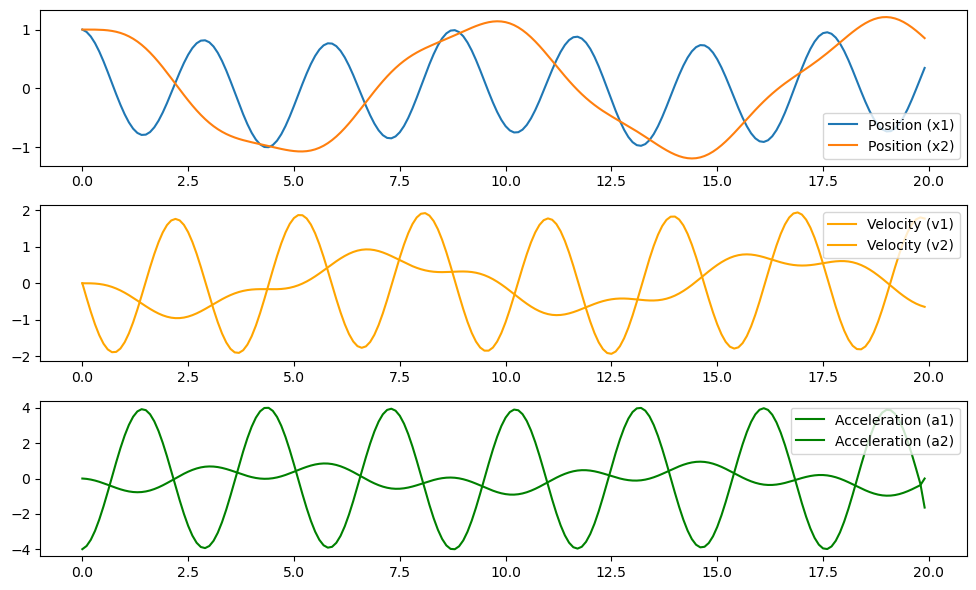

In [24]:
# Jedna pružina

m1 = 1
k1 = 4
dt = 0.1
t_max = 20
t = np.arange(0, t_max, dt)
x1 = np.zeros_like(t)
v1 = np.zeros_like(t)
a1 = np.zeros_like(t)
x1[0] = 1.0
v1[0] = 0.0
a1[0] = -k1/m * x1[0]

# Druhá pružina

m2 = 2
k2 = 1
x2 = np.zeros_like(t)
x2[0] = 1.0
v2 = np.zeros_like(t)
v2[0] = 0.0
a2 = np.zeros_like(t)
a2[0] = -k2/m2 * x2[0]

def harmonic_oscillator(x1, v1, a1, x2, v2, a2, k1 = k1, m1 = m1, k2 = k2, m2 = m2, t = t, dt = dt):
    for i in range(len(t)-1):
        a1[i] = -k1/m1 * x1[i] + k2/m2 * (x2[i] - x1[i])
        a2[i] = -k2/m2 * (x2[i] - x1[i])
        v1[i+1] = v1[i] + a1[i] * dt
        v2[i+1] = v2[i] + a2[i] * dt
        x1[i+1] = x1[i] + v1[i+1] * dt
        x2[i+1] = x2[i] + v2[i+1] * dt
    a1[-1] = -k1/m1 * x1[-1] - k2/m2 * (x2[-1] - x1[-1])
    return x1, v1, a1, x2, v2, a2

x1, v1, a1, x2, v2, a2 = harmonic_oscillator(x1, v1, a1, x2, v2, a2)

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)    
plt.plot(t, x1, label='Position (x1)')
plt.plot(t, x2, label='Position (x2)')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, v1, label='Velocity (v1)', color='orange')
plt.plot(t, v2, label='Velocity (v2)', color='orange')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, a1, label='Acceleration (a1)', color='green')
plt.plot(t, a2, label='Acceleration (a2)', color='green')
plt.legend()
plt.tight_layout()

### N-pružin

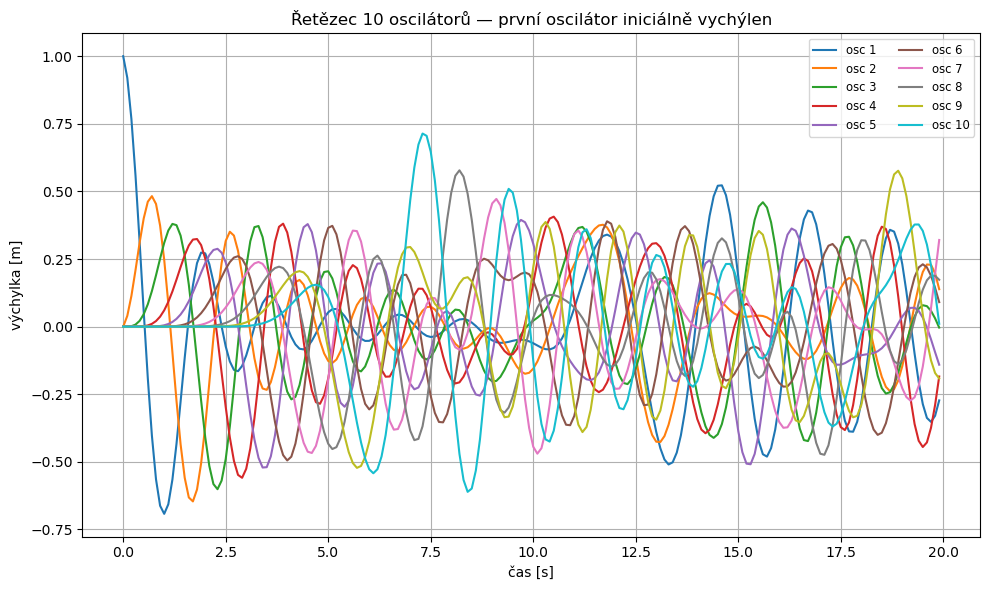

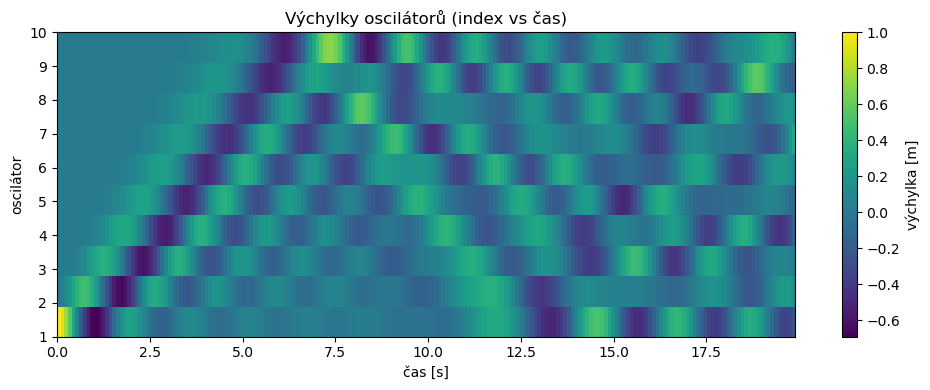

In [25]:
m = 1  # hmotnost [kg]
k = 4  # tuhost [N/m]
dt = 0.1  # časový krok [s]
t_max = 20  # maximální čas [s]
t = np.arange(0, t_max, dt)  # časová osa

n = 10

def multiple_harmonic_oscillator(t, n, k=k, m=m, dt=dt):
    # pole: řádky = oscilátory, sloupce = časové kroky
    X = np.zeros((n, len(t)))
    V = np.zeros_like(X)
    A = np.zeros_like(X)

    # počáteční podmínky: první oscilátor vychýlený, ostatní v klidu
    X[:, 0] = 0.0
    X[0, 0] = 1.0
    V[:, 0] = 0.0

    for ti in range(len(t) - 1):
        for j in range(n):
            left = X[j - 1, ti] if j - 1 >= 0 else 0.0
            right = X[j + 1, ti] if j + 1 < n else 0.0
            A[j, ti] = k * (left - 2 * X[j, ti] + right) / m
        V[:, ti + 1] = V[:, ti] + A[:, ti] * dt
        X[:, ti + 1] = X[:, ti] + V[:, ti + 1] * dt

    # poslední zrychlení
    for j in range(n):
        left = X[j - 1, -1] if j - 1 >= 0 else 0.0
        right = X[j + 1, -1] if j + 1 < n else 0.0
        A[j, -1] = k * (left - 2 * X[j, -1] + right) / m

    return X, V, A

X, V, A = multiple_harmonic_oscillator(t, n)

# vykreslení výchylek jednotlivých oscilátorů v čase
plt.figure(figsize=(10, 6))
for j in range(n):
    plt.plot(t, X[j], label=f'osc {j+1}')
plt.xlabel('čas [s]')
plt.ylabel('výchylka [m]')
plt.title(f'Řetězec {n} oscilátorů — první oscilátor iniciálně vychýlen')
plt.legend(ncol=2, fontsize='small')
plt.grid()
plt.tight_layout()
plt.show()

# alternativa: teplotní mapa výchylek (oscilátor vs čas)
plt.figure(figsize=(10, 4))
plt.imshow(X, aspect='auto', origin='lower', extent=[t[0], t[-1], 1, n])
plt.colorbar(label='výchylka [m]')
plt.xlabel('čas [s]')
plt.ylabel('oscilátor')
plt.title('Výchylky oscilátorů (index vs čas)')
plt.tight_layout()
plt.show()

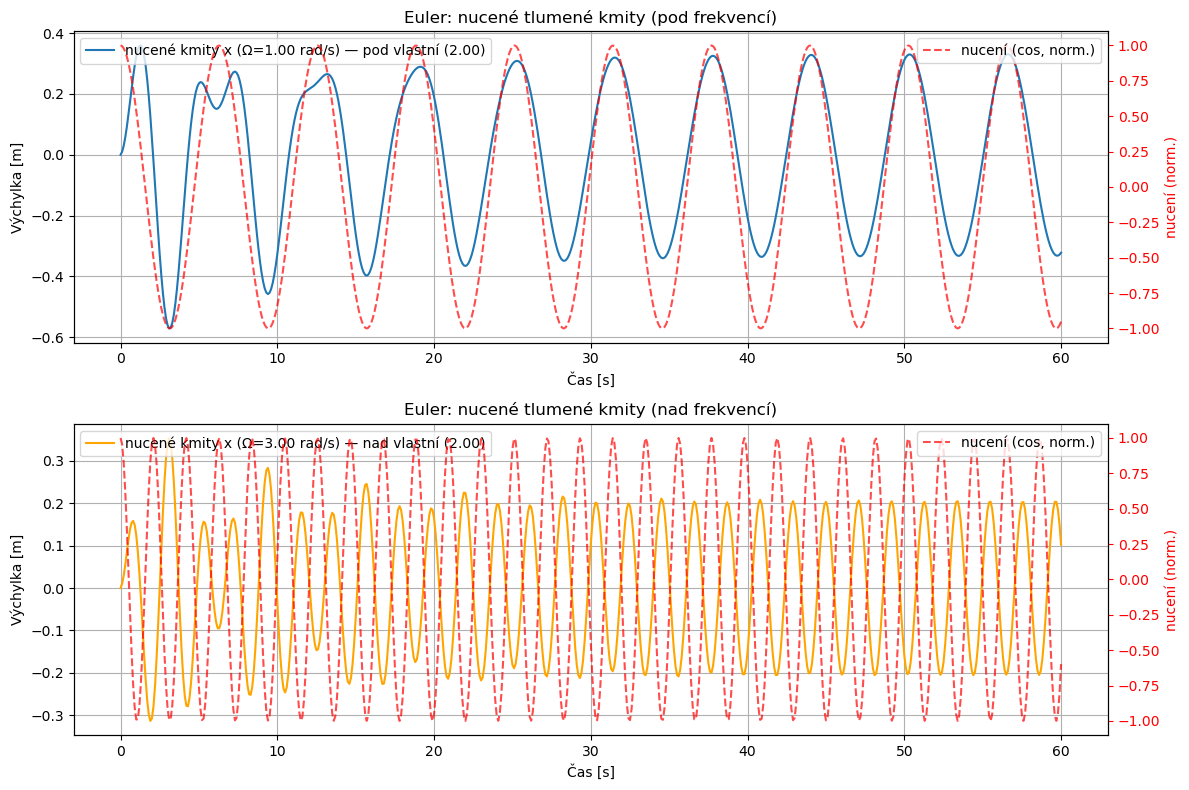

In [26]:
# semi-implicit (symplectic) Euler pro tlumené nucené kmity - dvě frekvence (pod a nad vlastní)
b = 0.2      # tlumení [Ns/m]
F0 = 1.0     # amplituda vnější síly [N]

omega = np.sqrt(k / m)            # vlastní úhlová frekvence
Omega_low = 0.5 * omega           # pod frekvencí
Omega_high = 1.5 * omega          # nad frekvencí

t_max = 60.0
h = 0.1
n_steps = int(t_max / h)
t = np.linspace(0, t_max, n_steps + 1)

def semi_implicit_euler(m, k, b, F0, Omega, t, h):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = 0.0
    v[0] = 0.0
    for i in range(len(t)-1):
        ti = t[i]
        a = -(k/m) * x[i] - (b/m) * v[i] + (F0/m) * np.cos(Omega * ti)
        v[i+1] = v[i] + a * h
        x[i+1] = x[i] + v[i+1] * h
    return x, v

x_low, v_low = semi_implicit_euler(m, k, b, F0, Omega_low, t, h)
x_high, v_high = semi_implicit_euler(m, k, b, F0, Omega_high, t, h)

# forcing signals (normované, aby se dobře zobrazily vedle výchylky)
force_low = np.cos(Omega_low * t)
force_high = np.cos(Omega_high * t)

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

ax = axs[0]
ax.plot(t, x_low, label=f'nucené kmity x (Ω={Omega_low:.2f} rad/s) — pod vlastní ({omega:.2f})')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Výchylka [m]')
ax.set_title('Euler: nucené tlumené kmity (pod frekvencí)')
ax.grid(True)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(t, force_low, 'r--', alpha=0.7, label='nucení (cos, norm.)')
ax2.set_ylabel('nucení (norm.)', color='r')
ax2.tick_params(axis='y', colors='r')
ax2.legend(loc='upper right')

ax = axs[1]
ax.plot(t, x_high, label=f'nucené kmity x (Ω={Omega_high:.2f} rad/s) — nad vlastní ({omega:.2f})', color='orange')
ax.set_xlabel('Čas [s]')
ax.set_ylabel('Výchylka [m]')
ax.set_title('Euler: nucené tlumené kmity (nad frekvencí)')
ax.grid(True)
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(t, force_high, 'r--', alpha=0.7, label='nucení (cos, norm.)')
ax2.set_ylabel('nucení (norm.)', color='r')
ax2.tick_params(axis='y', colors='r')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()